In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
data=pd.read_csv("Medical_cost.csv")

In [54]:
df=pd.DataFrame(data=data)

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [58]:
df['sex']=le.fit_transform(df['sex'])

In [59]:
df['smoker']=le.fit_transform(df['smoker'])

In [60]:
df['region']=le.fit_transform(df["region"])

In [61]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [63]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [64]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
305,29,1,33.345,2,0,1,19442.3535


In [65]:
df.shape

(1338, 7)

In [66]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [70]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

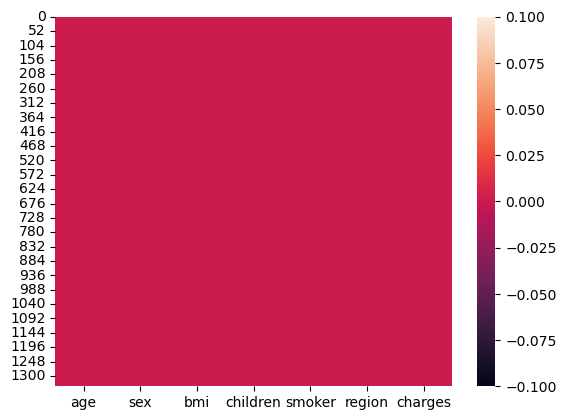

In [71]:
sns.heatmap(df.isnull())

In [72]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


key observations:

1.The mean is not more the median(50th percentile) so no skewed data is present.

2. There is a  difference in 75% percentile and max in age,bmi columns.

3.  2 observation suggest that there are  outliers presents in the columns mentioned in 2 observation.

<AxesSubplot:xlabel='age'>

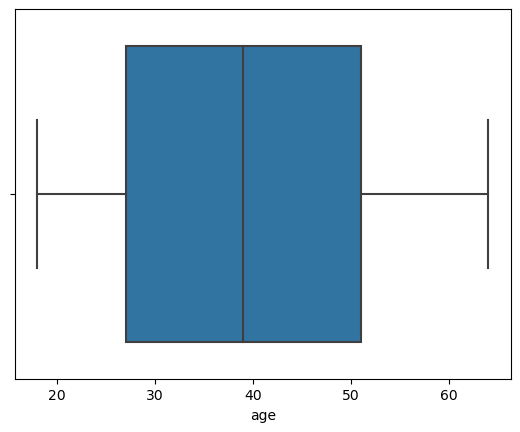

In [73]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='bmi'>

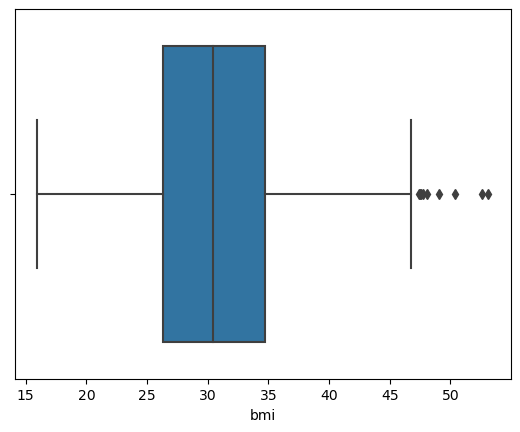

In [74]:
sns.boxplot(df.bmi)

<AxesSubplot:xlabel='sex'>

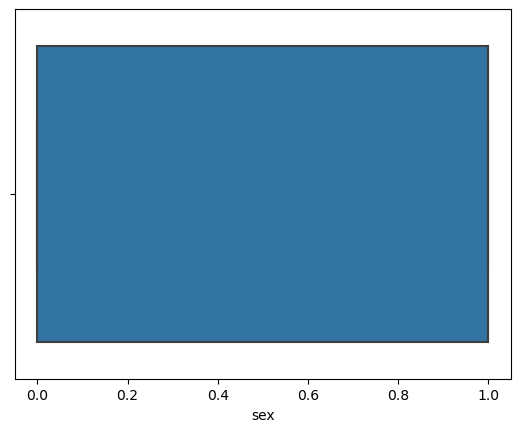

In [79]:
sns.boxplot(df.sex)

<AxesSubplot:xlabel='children'>

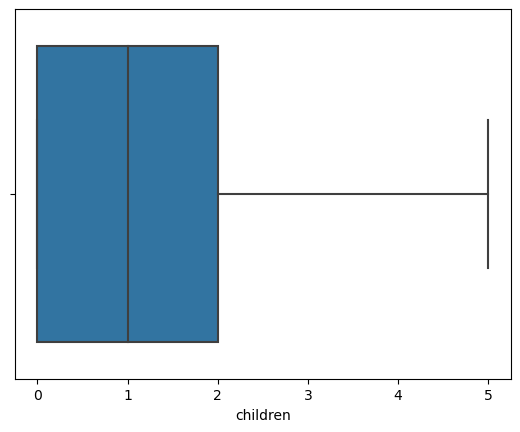

In [80]:
sns.boxplot(df.children)

<AxesSubplot:xlabel='smoker'>

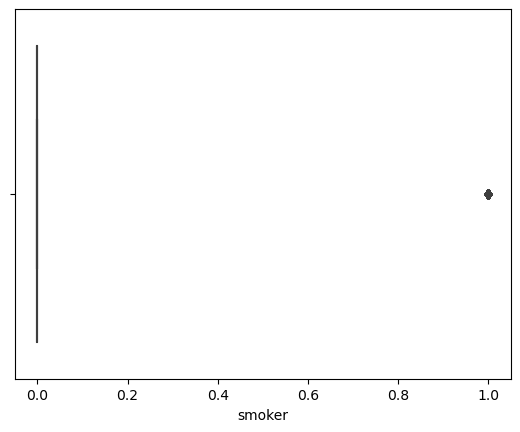

In [81]:
sns.boxplot(df.smoker)

<AxesSubplot:xlabel='region'>

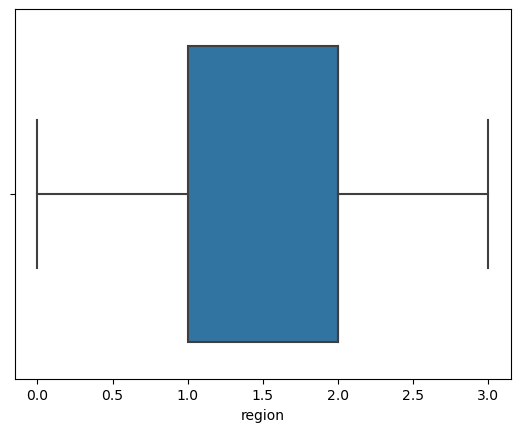

In [82]:
sns.boxplot(df.region)

<AxesSubplot:xlabel='charges'>

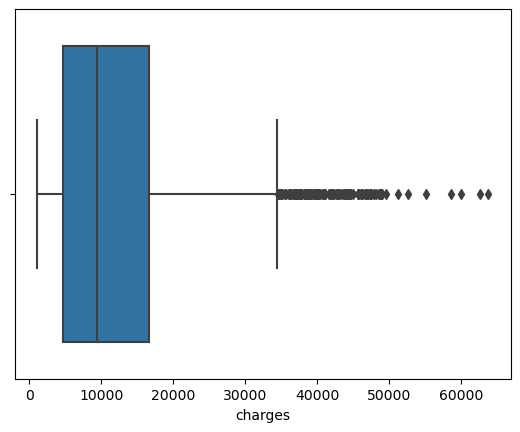

In [88]:
sns.boxplot(df.charges)

age            AxesSubplot(0.125,0.53;0.110714x0.35)
sex         AxesSubplot(0.257857,0.53;0.110714x0.35)
bmi         AxesSubplot(0.390714,0.53;0.110714x0.35)
children    AxesSubplot(0.523571,0.53;0.110714x0.35)
smoker      AxesSubplot(0.656429,0.53;0.110714x0.35)
region      AxesSubplot(0.789286,0.53;0.110714x0.35)
charges        AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

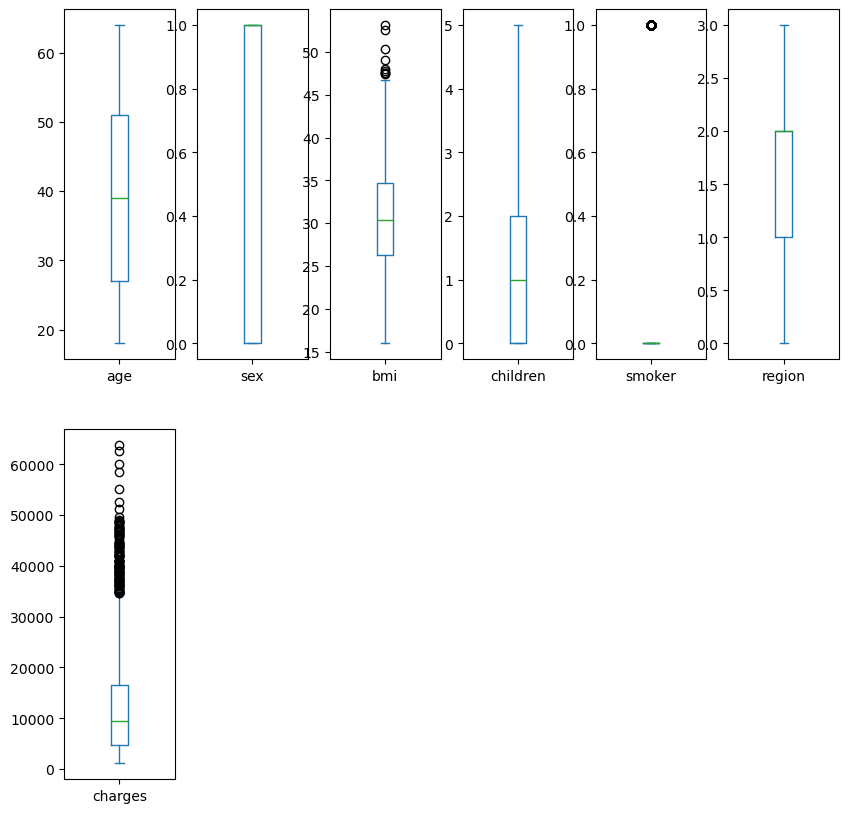

In [87]:
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(10,10))

from the above univarent analysis we get to know that there are outliers present in  dataset(bmi and smoker ,charges columns)

Removing outliers

In [83]:
from scipy.stats import zscore

In [84]:
z=np.abs(zscore(df))

In [85]:
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [86]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [89]:
df_n=df[(z<3).all(axis=1)]

In [90]:
df_n

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [227]:
df=df_n

In [228]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [229]:
x=df.iloc[:,0:-1]

In [230]:
x.shape

(1309, 6)

In [231]:
y=df.iloc[:,-1]

In [232]:
y.shape

(1309,)

In [233]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=42)

In [234]:
xtrain.shape

(877, 6)

In [235]:
ytrain.shape

(877,)

In [236]:
lg=LinearRegression()

In [237]:
lg

LinearRegression()

In [238]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [239]:
lg.score(xtrain,ytrain)

0.7493924611934304

In [240]:
pred=lg.predict(xtest)

In [241]:
mean_squared_error(ytest,pred)

35724343.63310832

In [242]:
print("error")
print("Mean squared error = ",mean_squared_error(ytest,pred))
print("Mean absolute error = ",mean_absolute_error(ytest,pred))
print("Root mean squared error = ",np.sqrt(mean_squared_error(ytest,pred)))

error
Mean squared error =  35724343.63310832
Mean absolute error =  4248.605119196662
Root mean squared error =  5976.984493296625


In [243]:
p=p.reshape(1,-1)

In [244]:
p.shape

(1, 6)

In [245]:
lg.predict(p)

array([5549.76125949])

The model is predicting nearly the right charges of medical cost personal insurance